<small><i>This notebook was put together by [Volha Hedranovich](http://www.rocketscience.ai) and [Alexander Fridman](http://www.rocketscience.ai) for the Lecture Course. Source and license info is on [GitHub](https://github.com/volhahedranovich/jupyter_lectures).</i></small>

## KMeans for Image Posterization

One interesting application of clustering is an image colours compression. 

First do initial imports.

In [4]:
import os

import imageio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans


sns.set()
%matplotlib inline

Let's select one of the pictures:

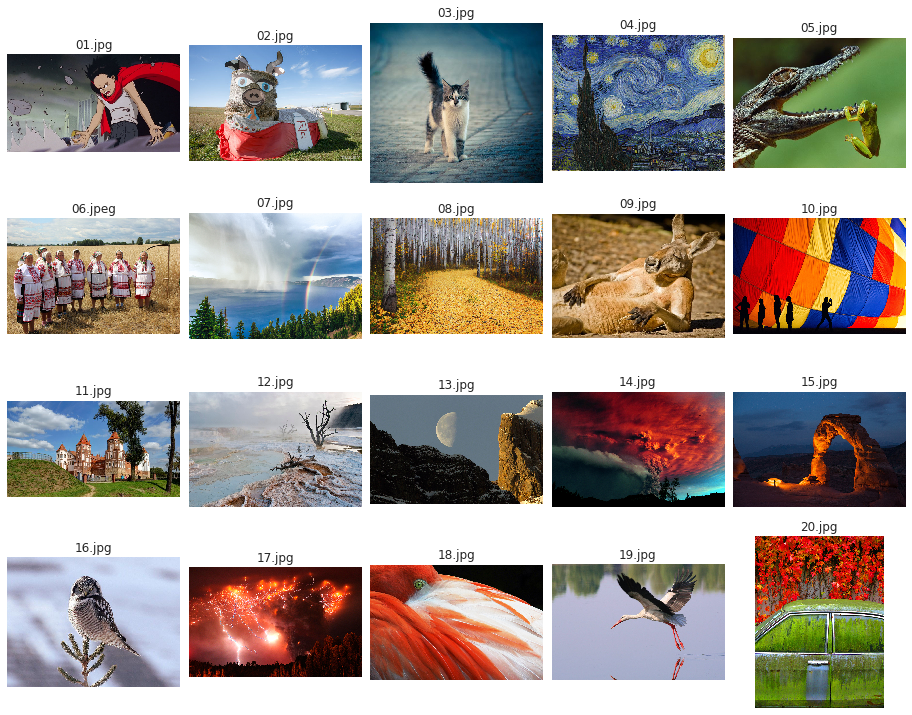

In [26]:
DATA_DIR = 'data/images-posterization'

file_names = os.listdir(DATA_DIR)

n_cols = 5
n_rows = int(np.ceil(len(file_names) / n_cols))

plt.figure(figsize=(13, 2 * n_rows + 2))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

for i, file_name in enumerate(sorted(file_names)):
    plt.subplot(n_rows, n_cols, i + 1)
    img_path = os.path.join(DATA_DIR, file_name)
    image = imageio.imread(img_path)
    plt.title(file_name)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

The image is stored in a 3-dimensional array, of size ``(height, width, RGB)``:

(450, 600, 3)

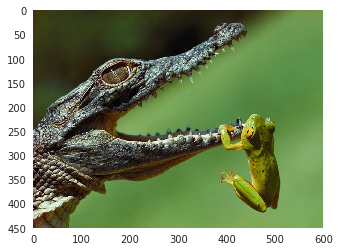

In [41]:
img_num = '05'

image = imageio.imread(os.path.join(DATA_DIR, '{}.jpg'.format(img_num)))
plt.imshow(image)
plt.grid(False)
image.shape

Let's normalize the colours so they lie between 0 and 1, then reshape the 3-d array into a 2-d array:

In [42]:
X = (image / 255.0).reshape(-1, 3)
X.shape

(270000, 3)

Our task is to use KMeans to compress the $256^3$ colours into a smaller number (say, 3 colours). Therefore, we have to split the data into $N_{colour}$ clusters, and create a new image where a true point colour is replaced by the colour of the centroid, which belongs to the same cluster as the point does.

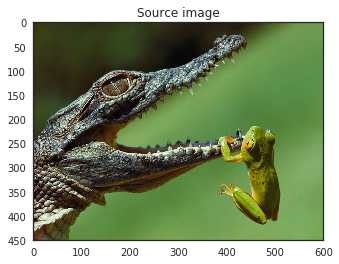

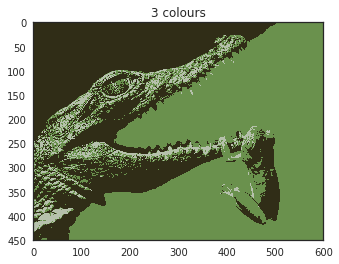

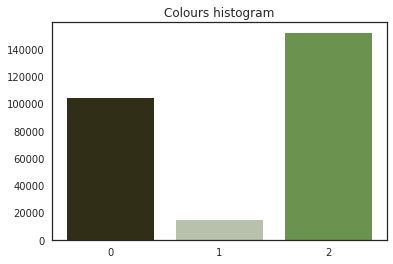

In [43]:
# set number of resulting colours
n_colours = 3


# clustering
model = KMeans(n_colours, n_init=1)
labels = model.fit_predict(X)
colours = model.cluster_centers_

new_image = colours[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)


# plotting
with sns.axes_style('white'):
    plt.imshow(image)
    plt.title('Source image')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colours'.format(n_colours))
    
    plt.figure()
    plt.title('Colours histogram')
    values, counts = np.unique(labels, return_counts=True)
    plt.bar(values, counts, color=colours)
    plt.xticks(values);